In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import RocCurveDisplay, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso



from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_original=pd.read_csv('/content/drive/MyDrive/IAA/Tp_Final/healthcare-dataset-stroke-data.csv')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IAA/Tp_Final/healthcare-dataset-stroke-data.csv')


In [ ]:
df_original.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1


In [ ]:
df.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1



---
Preprocesado



Valores Faltantes


In [ ]:
pd.isna(df).sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df_na=df[df['bmi'].isna()]
df_na.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1


In [ ]:
df=df.fillna({'bmi': df["bmi"].median()})

Genero Otro

In [ ]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
df=df.query('gender!="Other"')

Escalado Estandar

In [ ]:
scaler = StandardScaler()
df[["age","bmi","avg_glucose_level"]]=scaler.fit_transform(df[["age","bmi","avg_glucose_level"]])


One Hot Encoding

In [ ]:
df["gender"]=np.where(df["gender"] == "Male",1,0)
df["ever_married"]=np.where(df["ever_married"] == "Yes",1,0)
df["Residence_type"]=np.where(df["Residence_type"] == "Urban",1,0)

In [ ]:
df=pd.get_dummies(df, columns=["work_type", "smoking_status"], drop_first=True)



---


Exploración de datos



In [ ]:
df_strokes=df_original.query("stroke==1")
df_no_strokes=df_original.query("stroke==0")

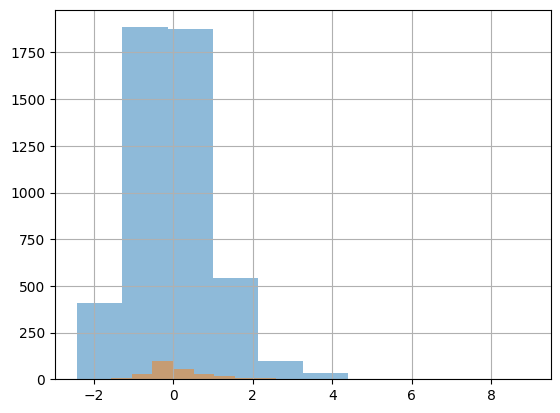

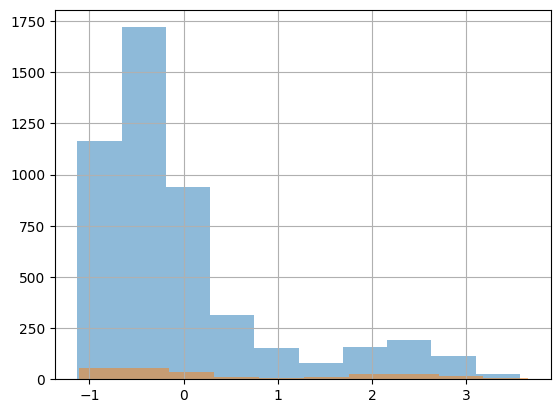

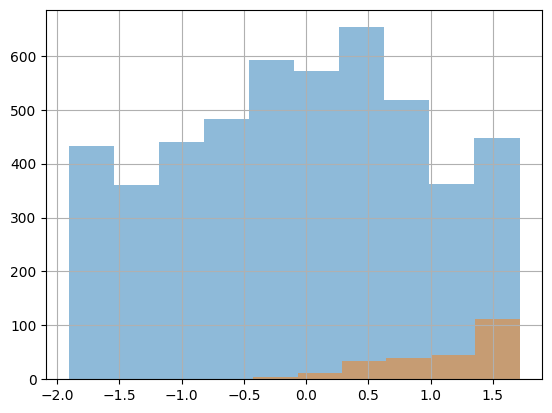

In [ ]:
df.groupby('stroke').bmi.hist(alpha = 0.5)
plt.show()
df.groupby('stroke').avg_glucose_level.hist(alpha = 0.5)
plt.show()
df.groupby('stroke').age.hist(alpha = 0.5)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

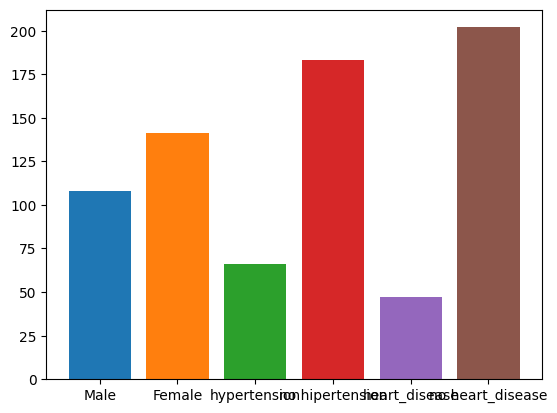

In [ ]:
male_cant=df_strokes.query("gender=='Male'")["stroke"].sum()
female_cant=df_strokes.query("gender=='Female'")["stroke"].sum()
plt.bar("Male", male_cant)
plt.bar("Female", female_cant)
plt.show
hyp=df_strokes["hypertension"]==1
hyp=hyp.sum()
no_hyp=df_strokes["hypertension"]==0
no_hyp=no_hyp.sum()
plt.bar("hypertension", hyp)
plt.bar("no hipertension", no_hyp)
plt.show
heart_disease=df_strokes["heart_disease"]==1
heart_disease=heart_disease.sum()
no_heart_disease=df_strokes["heart_disease"]==0
no_heart_disease=no_heart_disease.sum()
plt.bar("heart_disease", heart_disease)
plt.bar("no heart_disease", no_heart_disease)
plt.show



---


Modelos

In [ ]:
X=df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']]
y=df["stroke"]

<ipython-input-20-8a3b8fdbbf1d>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_lasso, y)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.090e+02, tolerance: 2.369e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Coeficientes de Lasso variando el alpha')

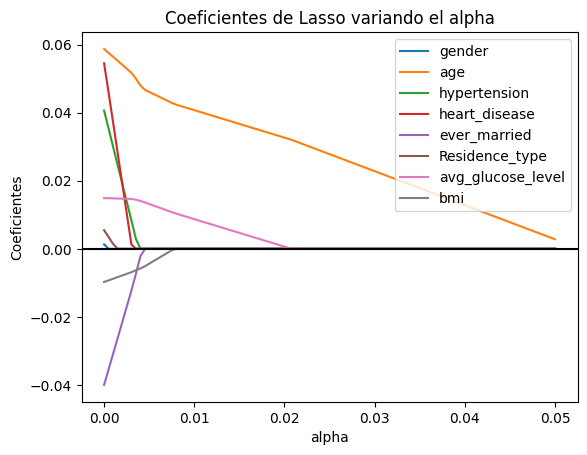

In [ ]:
X_lasso=df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','Residence_type', 'avg_glucose_level', 'bmi']]
alphas = np.linspace(0,0.05,100)
lasso = Lasso(max_iter=1000)
coefs3 = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_lasso, y)
    coefs3.append(lasso.coef_)
coefs4 = []
for coef_s in range(len(X_lasso.columns)):
  coeficientes=[]
  for coe in coefs3:
    coeficientes.append(coe[coef_s])
  coefs4.append(coeficientes)

for value in range(len(X_lasso.columns)):
  plt.plot(alphas, coefs4[value], label=X_lasso.columns[value])
plt.axhline(y=0, color='black', linestyle='-')
leg = plt.legend(loc='upper right')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes')
plt.title('Coeficientes de Lasso variando el alpha')

<ipython-input-21-def787e9029f>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_lasso, y)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.090e+02, tolerance: 2.369e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Coeficientes de Lasso variando el alpha')

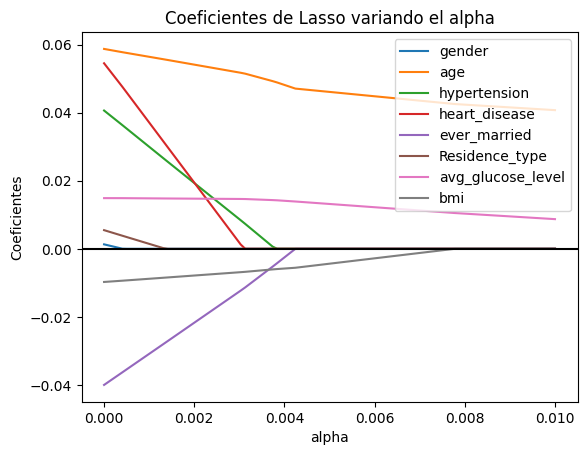

In [ ]:
alphas = np.linspace(0,0.01,100)
lasso = Lasso(max_iter=1000)
coefs3 = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_lasso, y)
    coefs3.append(lasso.coef_)
coefs4 = []
for coef_s in range(len(X_lasso.columns)):
  coeficientes=[]
  for coe in coefs3:
    coeficientes.append(coe[coef_s])
  coefs4.append(coeficientes)

for value in range(len(X_lasso.columns)):
  plt.plot(alphas, coefs4[value], label=X_lasso.columns[value])
plt.axhline(y=0, color='black', linestyle='-')
leg = plt.legend(loc='upper right')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes')
plt.title('Coeficientes de Lasso variando el alpha')

Sin equilibrar el desbalanceo





In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
#Se hace Grid_search para el modelo logistico
lg_md = LogisticRegression(random_state=42)

param_grid_lg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
}
grid_search = GridSearchCV(lg_md, param_grid_lg, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



In [ ]:
print("Los mejores parametros encontrados fueron:", grid_search.best_params_)



Los mejores parametros encontrados fueron: {'C': 0.001, 'penalty': 'l2'}


In [ ]:
logistic_model = LogisticRegression(C= grid_search.best_params_["C"], penalty=grid_search.best_params_["penalty"],random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
logistic_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_lg = logistic_model.predict(X_test)

# Calcular la precisión
accuracy_lg = accuracy_score(y_test, y_pred_lg)

#Hacer Validación Cruzada
cvs_lg=cross_val_score(logistic_model, X_train, y_train, cv=10)


In [ ]:
print(f'Precisión del modelo de Regresión Logística: {accuracy_lg:.2f}')
print(f"promedio de {cvs_lg.mean():.2f} con una desviación de {cvs_lg.std():.3f}")

Precisión del modelo de Regresión Logística: 0.96
promedio de 0.95 con una desviación de 0.001


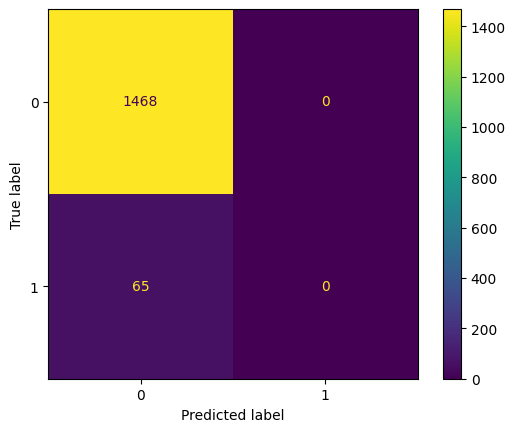

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lg), display_labels=logistic_model.classes_).plot()

Undersampleo

In [ ]:
# Crear el objeto RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicar el submuestreo a tus datos
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Guardar los resultados en nuevas variables
X_undersampled = pd.DataFrame(X_resampled, columns=X.columns)
y_undersampled = pd.Series(y_resampled, name='stroke')

In [ ]:
print(X_undersampled.shape)
print((y_undersampled==0).sum())
print((y_undersampled==1).sum())

(366, 15)
183
183


In [ ]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_undersampled, y_undersampled, test_size=0.3, random_state=42)

In [ ]:
#Se hace Grid_search para el modelo logistico
lg_md_us = LogisticRegression(random_state=42)

param_grid_us = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
}
grid_search_us = GridSearchCV(lg_md_us, param_grid_us, cv=5, scoring='accuracy')
grid_search_us.fit(X_train_under, y_train_under)


In [ ]:
print("Los mejores parametros encontrados fueron:", grid_search_us.best_params_)

Los mejores parametros encontrados fueron: {'C': 1, 'penalty': 'l2'}


In [ ]:
logistic_model_under = LogisticRegression(C=grid_search_us.best_params_["C"], penalty=grid_search_us.best_params_["penalty"],random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
logistic_model_under.fit(X_train_under, y_train_under)

# Realizar predicciones en el conjunto de prueba
y_pred_lg_under = logistic_model_under.predict(X_test_under)

# Calcular la precisión
accuracy_lg_under = accuracy_score(y_test_under, y_pred_lg_under)

#Hacer Validación Cruzada
cvs_lg_under=cross_val_score(logistic_model_under, X_train_under, y_train_under, cv=20)


In [ ]:
print(f'Precisión del modelo de Regresión Logística: {accuracy_lg_under:.2f}')
print(F"promedio de {cvs_lg_under.mean():.2f} con una desviación de {cvs_lg_under.std():.3f}")

Precisión del modelo de Regresión Logística: 0.79
promedio de 0.76 con una desviación de 0.121


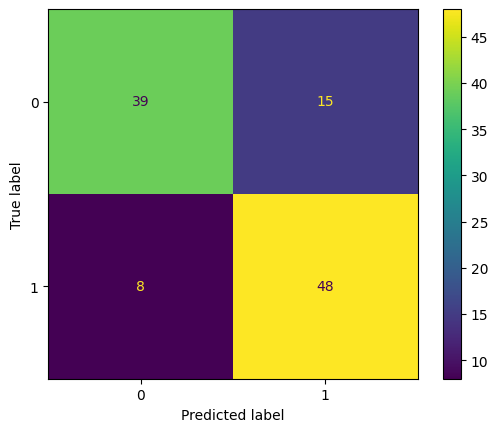

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test_under, y_pred_lg_under), display_labels=logistic_model.classes_).plot()

Sobresampleo

In [ ]:
# Crear el objeto RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Aplicar el sobremuestreo a tus datos
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Guardar los resultados en nuevas variables
X_oversampled = pd.DataFrame(X_resampled, columns=X.columns)
y_oversampled = pd.Series(y_resampled, name='stroke')

In [ ]:
print(X_oversampled.shape)
print((y_oversampled==0).sum())
print((y_oversampled==1).sum())

(6784, 15)
3392
3392


In [ ]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)

In [ ]:
#Se hace Grid_search para el modelo logistico
lg_md_over = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
}
grid_search = GridSearchCV(lg_md_over, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_over, y_train_over)

In [ ]:
print("Los mejores parametros encontrados fueron:", grid_search.best_params_)

Los mejores parametros encontrados fueron: {'C': 1, 'penalty': 'l2'}


In [ ]:
logistic_model_over = LogisticRegression(C=grid_search.best_params_["C"], penalty=grid_search.best_params_["penalty"],random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
logistic_model_over.fit(X_train_over, y_train_over)

# Realizar predicciones en el conjunto de prueba
y_pred_lg_over = logistic_model_over.predict(X_test_over)

# Calcular la precisión
accuracy_lg_over = accuracy_score(y_test_over, y_pred_lg_over)

#Hacer Validación Cruzada
cvs_lg_over=cross_val_score(logistic_model_under, X_train_over, y_train_over, cv=20)


In [ ]:
print(f'Precisión del modelo de Regresión Logística: {accuracy_lg_over:.2f}')
print(F"promedio de {cvs_lg_over.mean():.2f} con una desviación de {cvs_lg_over.std():.3f}")

Precisión del modelo de Regresión Logística: 0.77
promedio de 0.78 con una desviación de 0.033


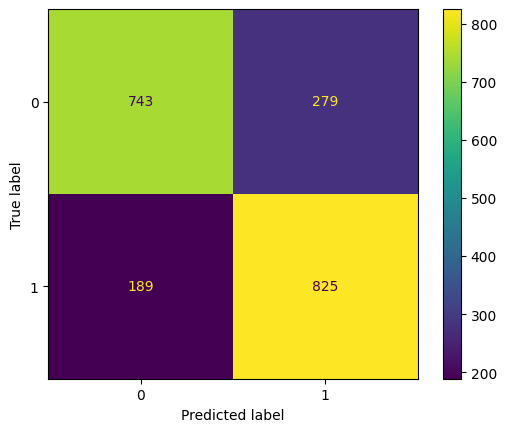

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test_over, y_pred_lg_over), display_labels=logistic_model.classes_).plot()

Comparar los modelos

In [ ]:
y_pred=logistic_model.predict(X_test)
y_pred_under=logistic_model_under.predict(X_test)
y_pred_over=logistic_model_over.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test, y_pred_under))
print(accuracy_score(y_test, y_pred_over))

0.9575994781474233
0.6914546640574037
0.7403783431180692


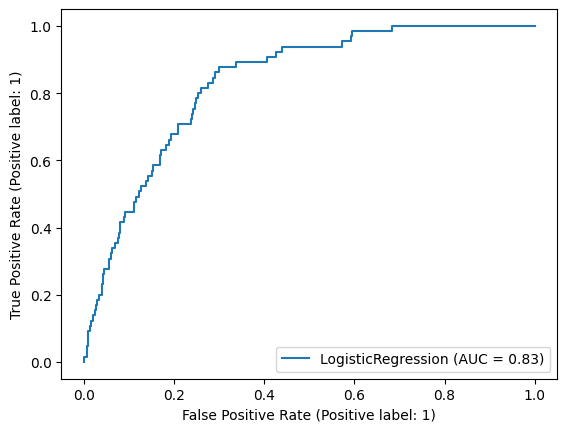

In [ ]:
RocCurveDisplay.from_estimator(logistic_model, X_test, y_test)

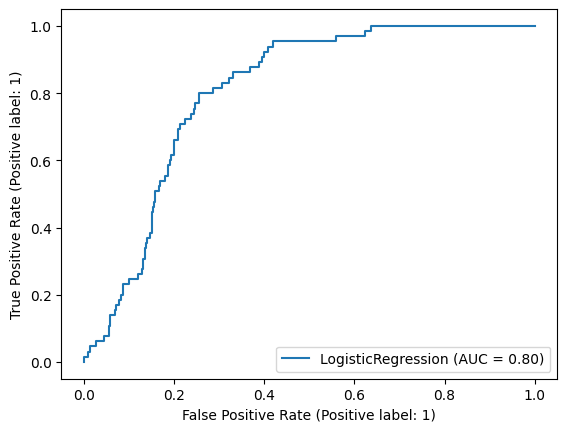

In [ ]:
RocCurveDisplay.from_estimator(logistic_model_under, X_test, y_test)

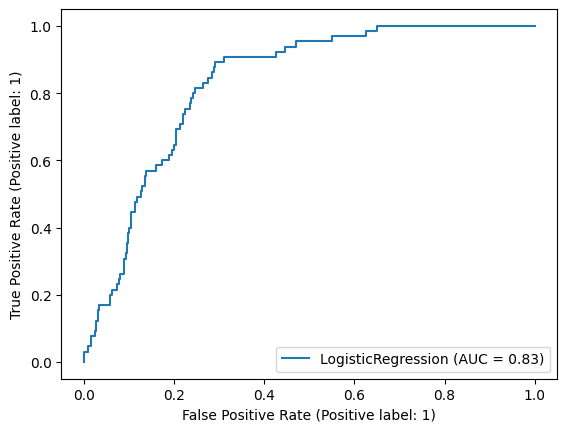

In [ ]:
RocCurveDisplay.from_estimator(logistic_model_over, X_test, y_test)